# Ejercicio 1:  Volterra-Lotka

## Sistema Volterra-Lotka

In [ ]:
### Seteando Para

In [1]:
import matplotlib.pyplot as plt # Libreria para graficos
import seaborn as sns # Graficos
import numpy as np # Algebra Lineal

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)
sns.set_style("darkgrid")

In [2]:
x = [10.0] # Poblacion de predadores
y = [10.0] # Poblacion de presas

a = 0.05
b = 0.002
c = 0.06
d = 0.004

step = 0.1
N = 500 # numero de muestras

In [3]:
t = np.arange(0,N,step)

file = open("VolterraLotka.txt", "w")

file.write("tiempo \t\t x \t\t y \n")

for i in range(int(N/step)-1):
    x.append(x[i] + step*(x[i]*(a - b*y[i])))
    y.append(y[i] + step*(-y[i]*(c - d*x[i])))
    file.write("{0:.2f} \t \t {0:.4f} \t \t {0:.4f} \n".format(t[i],x[i],y[i]))
    
# Cerrando el archivo abierto
file.close()


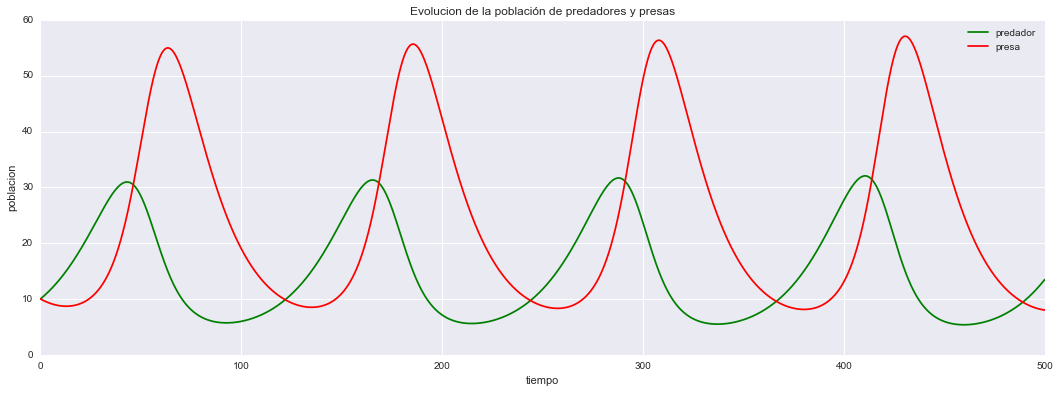

In [4]:
plt.title('Evolucion de la población de predadores y presas')
plt.plot(t, x,'g-',label='predador')
plt.plot(t, y,'r-',label='presa')
plt.grid()
plt.xlabel('tiempo')
plt.ylabel('poblacion')
plt.grid()
plt.legend(loc='best')
plt.show()

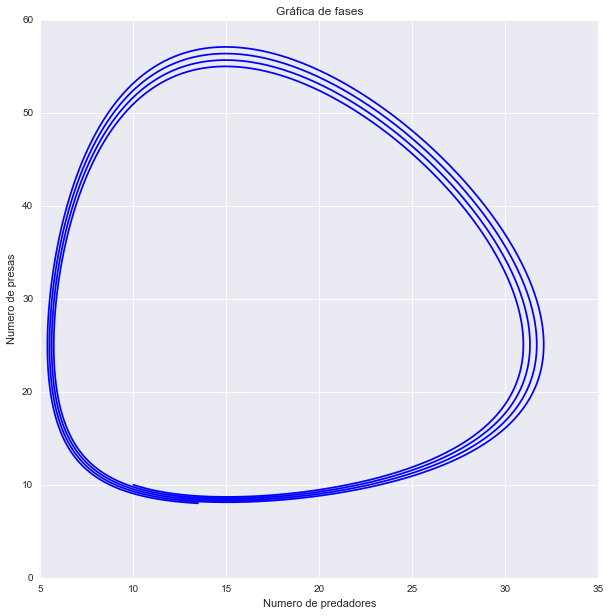

In [5]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Gráfica de fases')
plt.plot(x,y,'b-')
plt.xlabel('Numero de predadores')
plt.ylabel('Numero de presas')
plt.show()

## Analisis de estabilidad de las soluciones estacionarias

Cerca de estos dos puntos, el sistema puede ser linealizado: $ \frac{dX}{dt} = J(X)$ donde J es la matriz jacobiana evaluada en el punto correspondiente. Tenemos que definir la matriz Jacobiana:

In [6]:
def Jacobiano(X,a,b,c,d):
    return np.array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

El equilibrio se produce cuando la tasa de crecimiento es igual a 0. Esto da dos puntos fijos:

In [7]:
# soluciones estacionarias
X_0 = np.array([     0. ,  0.])
X_1 = np.array([ c/(d*b), a/b])

Cerca de __X_0__, que representa la extinción de ambas especies, tenemos:

In [8]:
J = Jacobiano(X_0,a,b,c,d) 
J

array([[ 0.05, -0.  ],
       [ 0.  , -0.06]])

Cerca de __X_0__, el número de conejos aumenta y la población de zorros disminuye. El origen es por lo tanto un punto silla.

In [9]:
lambda1, lambda2 = np.linalg.eigvals(J)
print("Los autovalores en el punto X_0 son:")
print(lambda1,lambda2)

Los autovalores en el punto X_0 son:
0.05 -0.06


Cerca a __X_1__, tenemos:

In [10]:
J2 = Jacobiano(X_1,a,b,c,d)
J2

array([[  0.00000000e+00,  -1.50000000e+01],
       [  2.00000000e-04,   0.00000000e+00]])

In [11]:
# Cuyos eigenvalores son +/- sqrt(c*a).j:
lambda1, lambda2 = np.linalg.eigvals(J2)
print("Los autovalores en el punto X_1 son:")
print(lambda1,lambda2)

Los autovalores en el punto X_1 son:
0.0547722557505j -0.0547722557505j


# Ejercicio 2

In [17]:
A = np.array([[0,  0,  0, -20, -30, -5],
              [0 , 0,  0, -1,  -3, -7],
              [0,  0,  0, -4,  -10, -20],
              [20, 30, 35, 0,  0,   0],
              [3,  3,  3,  0,  0,   0],
              [7,  8,  20, 0,  0,   0]
             ])

In [25]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


e1 , v1 = np.linalg.eig(A)

In [29]:
print('Los valores propios son : {}'.format(e1) )
print("""Vectores propios solucion 1 : \n 
v1 : {} \n 
v2 : {} \n
v3 : {} \n
v4 : {} \n
v5 : {} \n
v6 : {} \n
""".format(v1[0],v1[1],v1[2],v1[3],v1[4],v1[5]))

Los valores propios son : [ 0.00+33.63j  0.00-33.63j -0.00 +7.7j  -0.00 -7.7j  -0.39 +0.j    0.39 +0.j  ]
Vectores propios solucion 1 : 
 
v1 : [-0.00+0.54j -0.00-0.54j  0.87+0.j    0.87-0.j   -0.23+0.j    0.23+0.j  ] 
 
v2 : [ 0.00+0.09j  0.00-0.09j -0.14+0.j   -0.14-0.j    0.13+0.j   -0.13+0.j  ] 

v3 : [-0.00+0.29j -0.00-0.29j -0.34-0.j   -0.34+0.j    0.03+0.j   -0.03+0.j  ] 

v4 : [ 0.71+0.j    0.71-0.j    0.00-0.17j  0.00+0.17j -0.79+0.j   -0.79+0.j  ] 

v5 : [ 0.08+0.j    0.08-0.j    0.00-0.15j  0.00+0.15j  0.54+0.j    0.54+0.j  ] 

v6 : [ 0.31+0.j    0.31-0.j   -0.00+0.24j -0.00-0.24j -0.11+0.j   -0.11+0.j  ] 


